## K nearest neighbors (KNN)

Pick up a certain point, count k nearest neighbors, this point will be assigned to the classification of the majority. Only one parameter to be considered.

$k$ - the number of neighbors.<br>
Small $k$, non-smooth decision boundary, higher accuracy but lower interpretability; <br>
Large $k$, smooth decision boundary, lower accuracy but higher interpretability.

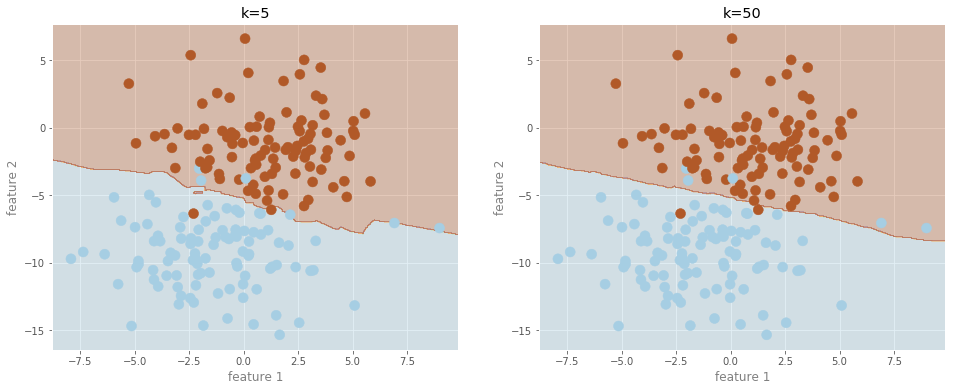

In [31]:
from sklearn import neighbors
from sklearn.datasets.samples_generator import make_blobs
plt.style.use('ggplot')

def plot_knn(ax,k,t):
    X, y = make_blobs(n_samples=200, centers=2,
                  random_state=2, cluster_std=2.50)
    
    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)

    ax.set_title(t)
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='Paired', zorder=3)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 500)
    y = np.linspace(ylim[0], ylim[1], 500)
    yy, xx = np.meshgrid(y, x)
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    ax.contourf(xx, yy, zz, cmap='Paired', alpha=0.3, zorder=1)
    
    
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_knn(ax[0], 5, 'k=5')
plot_knn(ax[1], 50, 'k=50')